In [1]:
import numpy as np
import landlab

from landlab.io import read_esri_ascii, write_esri_ascii 

from landlab.components import FlowAccumulator
from landlab.utils import get_watershed_masks_with_area_threshold
from landlab.utils import get_watershed_masks

from landlab.plot.imshow import imshow_grid



Bad key "text.kerning_factor" on line 4 in
/Users/elischwat/miniconda3/envs/landlab/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
(rmg, elevations) = read_esri_ascii("data/carbon_watershed_dem_10m.asc", name="topographic__elevation")

In [3]:
rmg.set_nodata_nodes_to_closed(elevations, -3.4028234663852886e+38)

In [11]:
outlet_id = rmg.core_nodes[np.argmin(rmg.at_node['topographic__elevation'][rmg.core_nodes])] # find the lowest point on our DEM?            

rmg.set_watershed_boundary_condition_outlet_id(outlet_id, elevations)    # set the lowest point as the outlet

print("Outlet ID=", outlet_id)                                        # print outlet id number
print("Outlet elevation=",rmg.at_node['topographic__elevation'][outlet_id])        # print elevation of outlet node
print("Min elevation of core nodes=", np.min(rmg.at_node['topographic__elevation'][rmg.core_nodes])) # print minimum elevation of core nodes
print("Max elevation of core nodes=", np.max(rmg.at_node['topographic__elevation'][rmg.core_nodes])) # print maximum elevation of core nodes

Outlet ID= 799445
Outlet elevation= 712.162841797
Min elevation of core nodes= 712.863647461
Max elevation of core nodes= 4152.06396484


In [12]:
rmg.status_at_node[outlet_id] == rmg.BC_NODE_IS_FIXED_VALUE

True

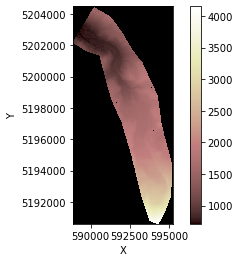

In [13]:
imshow_grid(rmg,'topographic__elevation')

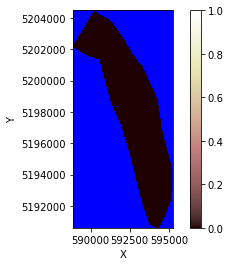

In [14]:
imshow_grid(rmg, rmg.status_at_node, color_for_closed="blue")

In [15]:
fr = FlowAccumulator(
    rmg,
    surface='topographic__elevation',
    flow_director='FlowDirectorD8',
    runoff_rate=None,
    depression_finder='DepressionFinderAndRouter')

In [17]:
(drainage_area, discharge) = fr.accumulate_flow()
print("Watershed area above outlet [m^2]=",rmg.at_node['drainage_area'][outlet_id]) 
print("Log10 of Watershed area above outlet [m^2]=",np.log10(rmg.at_node['drainage_area'][outlet_id])) 

Watershed area above outlet [m^2]= 31648600.0
Log10 of Watershed area above outlet [m^2]= 7.50035450343


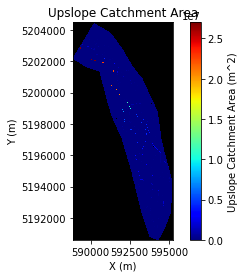

In [18]:
imshow_grid(rmg, drainage_area, plot_name = 'Upslope Catchment Area', 
            var_name = 'Upslope Catchment Area', var_units = 'm^2', grid_units = ('m','m'), 
            cmap = 'jet', limits = (0, 27000000))


<ipython-input-20-8b107163df3b>:1: RuntimeWarning: divide by zero encountered in log10
  imshow_grid(rmg, np.log10(drainage_area), plot_name = 'Upslope Catchment Area',


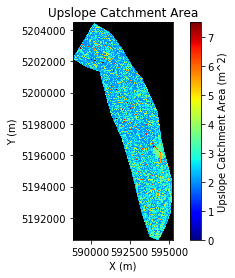

In [20]:
imshow_grid(rmg, np.log10(drainage_area), plot_name = 'Upslope Catchment Area', 
            var_name = 'Upslope Catchment Area', var_units = 'm^2', grid_units = ('m','m'), 
            cmap = 'jet', limits = (0, 7.5))

In [21]:
critical_area = 10000000

In [22]:
rmg.status_at_node[drainage_area > critical_area] = rmg.BC_NODE_IS_FIXED_VALUE

In [23]:
(drainage_area, discharge) = fr.accumulate_flow()

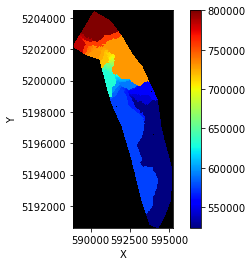

In [24]:
masks = get_watershed_masks(rmg)

rmg.add_field('node','mask',masks) 

imshow_grid(rmg, masks, cmap = 'jet')

In [26]:
write_esri_ascii('./masks.asc', rmg, 'mask', clobber=True)

['./masks.asc']